## **<center><font style="color:rgb(100,109,254)">System Programming Using Python Programming Language</font> </center>**
### **<center><font style="color:rgb(100,109,254)">Lab 02</font> </center>**

### **Directory and File Analysis Using OS, and Pandas**

### 1. Import Libraries

In [22]:
import os
import pandas as pd

### 2. Provide Directory Path

In [23]:
topDirPath = "C:/Users/hp/Google Drive/MSCS/Semester 01 (Fall 2022)"

### 3. Get the attributes(Files Name, Format, size etc.)

In [24]:
fileNames = []
dirNames = []
fileSize = []
filePath = []
fileFormat = []

for dirPath, dirName, fileName in os.walk(topDirPath):
    
    for file in fileName:
        if file is not None:
            nameAndFormat = os.path.splitext(file)
            
            fileNames.append(nameAndFormat[0])
            fileFormat.append(nameAndFormat[1])
            filePath.append(dirPath)
            fileSize.append(os.path.getsize(dirPath+f"\\{file}"))
            
    for dir in dirName:
       if dir is not None:
            dirNames.append(dir)

### 4. Store Infromation in Dictionary

In [50]:
Data = {}

Data["Name Of File"] = fileNames
Data["Format"] = fileFormat
Data["Size in Bytes"] = fileSize
Data["Path"] = filePath

### 5. Convert Dictionary to Data Frame

In [51]:
df = pd.DataFrame(Data)

### 6. Get the information of .PPT files from Data Frame

In [45]:
PPT = df[df["Format"] == ".pptx"]

### 7. Get the information of .DOC files from Data Frame

In [44]:
DOC = df[df["Format"] == ".docx"]

### 8. Get the information of .pdf files from Data Frame

In [47]:
PDF = df[df["Format"] == ".pdf"]

### 9. Store the Information in Excel File

In [49]:
with pd.ExcelWriter("DirectoriesDataSet.xlsx") as writer:
    df.to_excel(writer, sheet_name="Comprehensive", index=False)
    PPT.to_excel(writer, sheet_name="PPT Files", index=False)
    DOC.to_excel(writer, sheet_name="DOC Files", index=False)
    PDF.to_excel(writer, sheet_name="PDF Files", index=False)

### 10. Get the total Size of PPT, DOC, and PDF files in MB

In [64]:
sizeInMb = []
sizeInMb.append(round(PPT["Size in Bytes"].sum()/1000000, 2))
sizeInMb.append(round(DOC["Size in Bytes"].sum()/1000000, 2))
sizeInMb.append(round(PDF["Size in Bytes"].sum()/1000000, 2))
sizeInMb

[130.94, 1.56, 47.34]

### 11. Plot Pie chart forthe size of each format

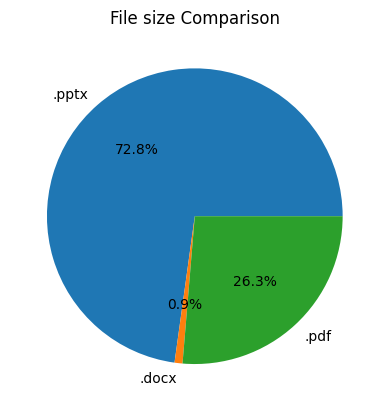

Text(0.5, 1.0, 'File size Comparison')

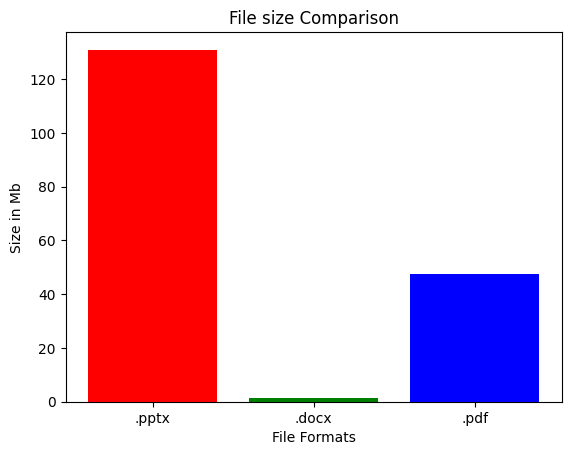

In [73]:
import matplotlib.pyplot as plt

labels = [".pptx", ".docx", ".pdf"]
colors = ['red', 'green', 'blue']

plt.figure(1)
plt.pie(sizeInMb, labels=labels, autopct='%1.1f%%')
plt.title('File size Comparison')
plt.show()

plt.figure(2)
plt.bar(labels, sizeInMb, color = colors)
plt.xlabel('File Formats')
plt.ylabel('Size in Mb')
plt.title('File size Comparison')

### **<center><font style="color:rgb(255, 0,0)">Full Code</font> </center>**

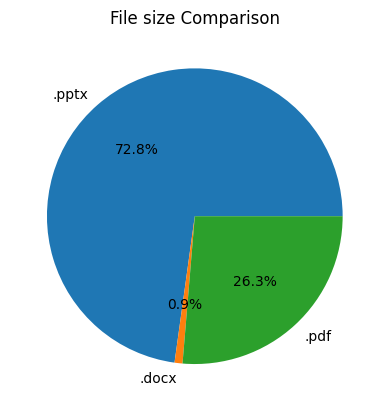

Text(0.5, 1.0, 'File size Comparison')

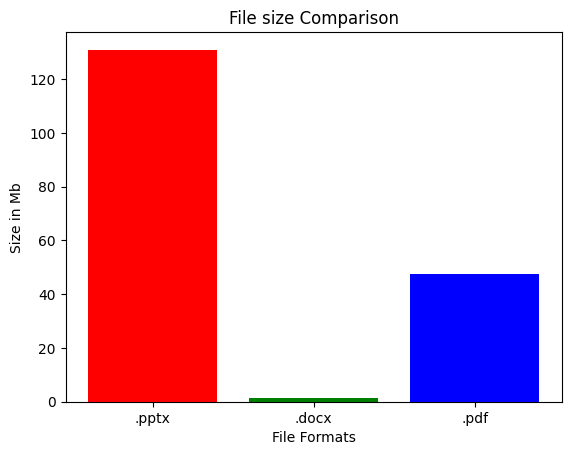

In [75]:
import os
import pandas as pd

fileNames = []
dirNames = []
fileSize = []
filePath = []
fileFormat = []

for dirPath, dirName, fileName in os.walk(topDirPath):
    
    for file in fileName:
        if file is not None:
            nameAndFormat = os.path.splitext(file)
            
            fileNames.append(nameAndFormat[0])
            fileFormat.append(nameAndFormat[1])
            filePath.append(dirPath)
            fileSize.append(os.path.getsize(dirPath+f"\\{file}"))
            
    for dir in dirName:
       if dir is not None:
            dirNames.append(dir)

Data = {}

Data["Name Of File"] = fileNames
Data["Format"] = fileFormat
Data["Size in Bytes"] = fileSize
Data["Path"] = filePath

df = pd.DataFrame(Data)
PPT = df[df["Format"] == ".pptx"]
DOC = df[df["Format"] == ".docx"]
PDF = df[df["Format"] == ".pdf"]

with pd.ExcelWriter("DirectoriesDataSet.xlsx") as writer:
    df.to_excel(writer, sheet_name="Comprehensive", index=False)
    PPT.to_excel(writer, sheet_name="PPT Files", index=False)
    DOC.to_excel(writer, sheet_name="DOC Files", index=False)
    PDF.to_excel(writer, sheet_name="PDF Files", index=False)

sizeInMb = []
sizeInMb.append(round(PPT["Size in Bytes"].sum()/1000000, 2))
sizeInMb.append(round(DOC["Size in Bytes"].sum()/1000000, 2))
sizeInMb.append(round(PDF["Size in Bytes"].sum()/1000000, 2))


import matplotlib.pyplot as plt

labels = [".pptx", ".docx", ".pdf"]
colors = ['red', 'green', 'blue']

plt.figure(1)
plt.pie(sizeInMb, labels=labels, autopct='%1.1f%%')
plt.title('File size Comparison')
plt.show()

plt.figure(2)
plt.bar(labels, sizeInMb, color = colors)
plt.xlabel('File Formats')
plt.ylabel('Size in Mb')
plt.title('File size Comparison')


### **PSUTIL Library**

**psutil** is a Python library that provides an interface for retrieving information about running processes and system utilization (such as CPU, memory, disk, and network usage) on various platforms (such as Linux, Windows, macOS, and BSD). It can be used to obtain detailed system information that is not easily available through standard Python libraries.

The psutil library provides a rich set of functions and classes to retrieve and manipulate system and process information. Some of the most commonly used functions and classes in psutil include:

* **psutil.cpu_percent():** Returns the current CPU usage as a percentage.
* **psutil.virtual_memory():** Returns information about the system's virtual memory usage.
* **psutil.disk_usage():** Returns information about the usage of a specified disk partition.
* **psutil.net_io_counters():** Returns information about network I/O statistics.
* **psutil.Process(pid):** Returns a Process object for the process with the specified process ID (PID).

### 1. Getting the Running Processes Names and there Process Id's

In [2]:
import psutil

#### 1.1 Get list of currently running processes

In [23]:
currRunnProcessName = []
currRunnProcessId = []
status = []

for p in psutil.process_iter():
    # print(p)
    currRunnProcessName.append(p.name())
    currRunnProcessId.append(p.pid)
    status.append(p.status())
    
# print(status)
# print(currRunnProcessName)
# print(currRunnProcessId)


#### 1.2 Store in dictionary

In [24]:
processData = {}

processData["Name"] = currRunnProcessName
processData["PID"] = currRunnProcessId
processData["Status"] = status

#### 1.3 Convert dictionary to data frame

In [25]:
import pandas as pd

PData = pd.DataFrame(processData)


print("----------------------------------------------------------------------")
print("\n\t\t Currently Running Processes\n")
print("----------------------------------------------------------------------")

PData

----------------------------------------------------------------------

		 Currently Running Processes

----------------------------------------------------------------------


,Name,PID,Status
0,System Idle Process,0,running
1,System,4,running
2,svchost.exe,72,running
3,Registry,100,running
4,msedge.exe,244,running
...,...,...,...
245,chrome.exe,16360,running
246,RuntimeBroker.exe,16480,running
247,LockApp.exe,16500,stopped
248,chrome.exe,16536,running


### 2. Finding the CPU utilization of each process

In [26]:

for process in psutil.process_iter():
    process_name = process.name()
    process_id = process.pid
        
    # Get the process CPU utilization
    cpu_percent = process.cpu_percent(interval=1.0)
        
    # Print the process name, ID, and CPU utilization
    print(f"{process_name} (PID {process_id}): {cpu_percent}%")

System Idle Process (PID 0): 139.1%
System (PID 4): 10.9%
svchost.exe (PID 72): 0.0%
Registry (PID 100): 0.0%
msedge.exe (PID 244): 0.0%
smss.exe (PID 412): 0.0%
fontdrvhost.exe (PID 472): 0.0%
csrss.exe (PID 648): 0.0%
WUDFHost.exe (PID 728): 0.0%
wininit.exe (PID 736): 0.0%
services.exe (PID 884): 0.0%
lsass.exe (PID 892): 0.0%
chrome.exe (PID 1028): 0.0%
svchost.exe (PID 1056): 0.0%
svchost.exe (PID 1112): 0.0%
svchost.exe (PID 1124): 0.0%
Code.exe (PID 1232): 0.0%
igfxEM.exe (PID 1248): 0.0%
svchost.exe (PID 1324): 0.0%
svchost.exe (PID 1332): 0.0%
svchost.exe (PID 1340): 0.0%
svchost.exe (PID 1428): 0.0%
svchost.exe (PID 1488): 0.0%
svchost.exe (PID 1504): 0.0%
Code.exe (PID 1532): 28.1%
svchost.exe (PID 1592): 0.0%
svchost.exe (PID 1640): 0.0%
svchost.exe (PID 1720): 0.0%
svchost.exe (PID 1732): 0.0%
WUDFHost.exe (PID 1752): 0.0%
svchost.exe (PID 1804): 0.0%
conhost.exe (PID 1836): 0.0%
smartscreen.exe (PID 1840): 0.0%
svchost.exe (PID 1852): 0.0%
svchost.exe (PID 1880): 0.0%
exp

KeyboardInterrupt: 

In [1]:
import psutil

# Get a list of all currently running processes
processes = [p for p in psutil.process_iter()]

# Print the process name and ID for each running process
for process in processes:
    print(f"{process.name()} (PID {process.pid})")

System Idle Process (PID 0)
System (PID 4)
svchost.exe (PID 72)
Registry (PID 100)
msedge.exe (PID 244)
smss.exe (PID 412)
fontdrvhost.exe (PID 472)
csrss.exe (PID 648)
WUDFHost.exe (PID 728)
wininit.exe (PID 736)
services.exe (PID 884)
lsass.exe (PID 892)
chrome.exe (PID 1028)
svchost.exe (PID 1056)
svchost.exe (PID 1112)
svchost.exe (PID 1124)
igfxEM.exe (PID 1248)
svchost.exe (PID 1324)
svchost.exe (PID 1332)
svchost.exe (PID 1340)
GoogleDriveFS.exe (PID 1396)
svchost.exe (PID 1428)
svchost.exe (PID 1488)
svchost.exe (PID 1504)
Code.exe (PID 1532)
svchost.exe (PID 1592)
svchost.exe (PID 1640)
svchost.exe (PID 1720)
svchost.exe (PID 1732)
WUDFHost.exe (PID 1752)
svchost.exe (PID 1804)
conhost.exe (PID 1836)
smartscreen.exe (PID 1840)
svchost.exe (PID 1852)
svchost.exe (PID 1880)
explorer.exe (PID 1884)
svchost.exe (PID 1940)
svchost.exe (PID 1992)
chrome.exe (PID 2004)
svchost.exe (PID 2008)
svchost.exe (PID 2016)
svchost.exe (PID 2088)
msedge.exe (PID 2140)
GoogleDriveFS.exe (PID 21